# Video Games Sales Analysis
### Sunpreet S. Chahal 

This notebook will contain analysis on a collection of 16598 video games. Ranging from; different years, sales locations, plotforms and genres. 

I aim to:
- Visualise the most popular platforms and fluctuation of games sales over the years.
- Visualise the most popular genres per region.
- Visualise the most popular platforms per region.
- 
- 

Data Description:

- Rank - Ranking of overall sales
- Name - The games name
- Platform - Platform of the games release (i.e. PC,PS4, etc.)
- Year - Year of the game's release
- Genre - Genre of the game
- Publisher - Publisher of the game
- NA_Sales - Sales in North America (in millions)
- EU_Sales - Sales in Europe (in millions)
- JP_Sales - Sales in Japan (in millions)
- Other_Sales - Sales in the rest of the world (in millions)
- Global_Sales - Total worldwide sales.

*The sales are represented in copies, not a specific currency.*

In [12]:
## Import libraries
import pandas as pd
import numpy as ny
import matplotlib.pyplot as mpy
import matplotlib as mtp
import seaborn as sns
import datetime
#sns.set()

In [38]:
##Import Data
vgs = pd.read_csv("D:\\PROJECTS\\Video Game Sales ✔\\vgsales.csv")
vgs.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [14]:
vgs.shape

(16598, 11)

In [15]:
##Print Columns
cols = vgs.columns
cols

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [16]:
Ovgs = pd.to_datetime(vgs['Year'], errors='coerce')
Ovgs.tail()

16593   1970-01-01 00:00:00.000002002
16594   1970-01-01 00:00:00.000002003
16595   1970-01-01 00:00:00.000002008
16596   1970-01-01 00:00:00.000002010
16597   1970-01-01 00:00:00.000002003
Name: Year, dtype: datetime64[ns]

### Data Manipulation / Cleaning

In [17]:
##Locate any null values
vgs.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [18]:
##Fill null values
vgs = vgs.fillna('0')
vgs.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

### Data Viusalisation

#### Set-up

In [19]:
##Extract unique genres
genres = vgs.Genre.unique()
genres

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [20]:
##Extract unique platforms
platforms = vgs.Platform.unique()
platforms

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [21]:
cols

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

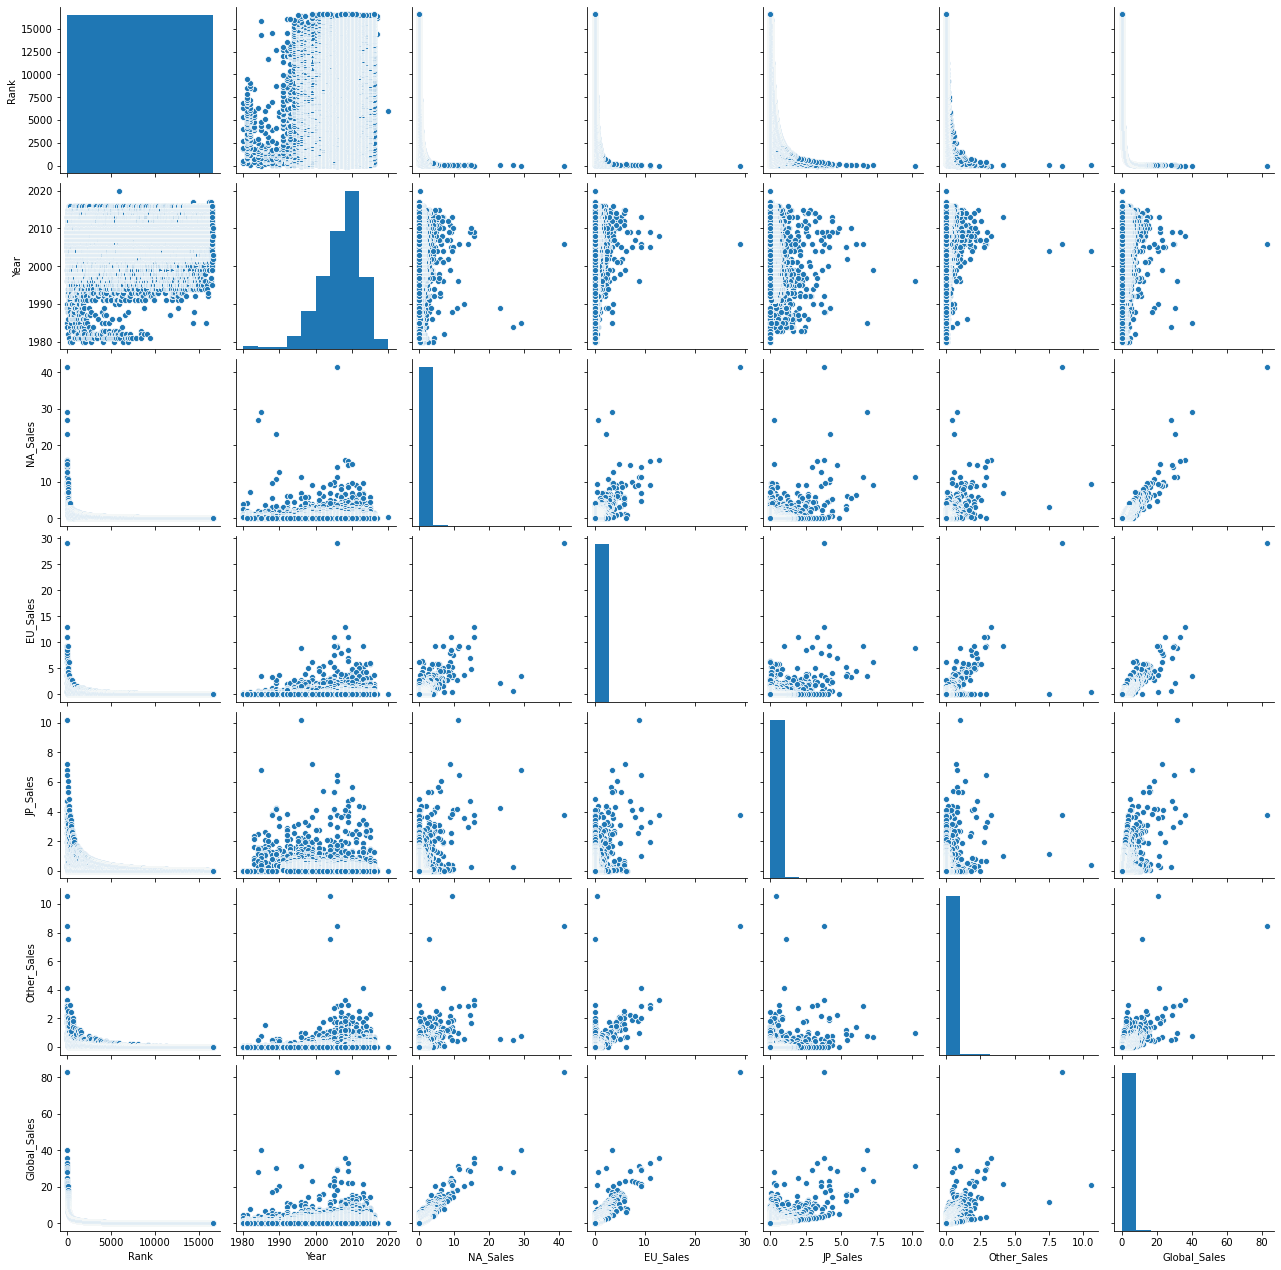

In [35]:
sns.pairplot(vgs)

#### Popular console comparison

I want to compare the best selling consoles and their sales trends since they were listed on the market.
The top 5 best selling consoles are:
- PS2
- Nintendo DS
- Gameboy
- PS4
- PS1 

*Sources: IGN and Statista

https://www.ign.com/articles/2019/10/30/top-15-best-selling-video-game-consoles-of-all-time

https://www.statista.com/statistics/268966/total-number-of-game-consoles-sold-worldwide-by-console-type/


In [41]:
##Extact data for each console
ps2 = vgs.loc[vgs['Platform'] == 'PS2']
nds = vgs.loc[vgs['Platform'] == 'DS']
gb = vgs.loc[vgs['Platform'] == 'GB']
ps4 = vgs.loc[vgs['Platform'] == 'PS4']
ps1 = vgs.loc[vgs['Platform'] == 'PS']
ps4.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
44,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
93,94,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,Activision,2.80,3.30,0.14,1.37,7.60


In [55]:
ps2yr = ps2.Year.sort_values().unique()
ndsyr = nds.Year.sort_values().unique()
gbyr = gb.Year.sort_values().unique()
ps4yr = ps4.Year.sort_values().unique()
ps1yr = ps1.Year.sort_values().unique()

##The Nintendo DS has incorrect data from 1985, convert data to list and remove the error.
ndsyrl = list(ndsyr)

In [56]:
ps2yr

array([2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011.,   nan])

In [57]:
ps2_00 = ps2.loc[ps2['Year'] == 2000]
ps2_00gs = ps2_00['Global_Sales'].sum()

ps2_01 = ps2.loc[ps2['Year'] == 2001]
ps2_01gs = ps2_01['Global_Sales'].sum()

ps2_02 = ps2.loc[ps2['Year'] == 2002]
ps2_02gs = ps2_02['Global_Sales'].sum()

ps2_03 = ps2.loc[ps2['Year'] == 2003]
ps2_03gs = ps2_03['Global_Sales'].sum()

ps2_04 = ps2.loc[ps2['Year'] == 2004]
ps2_04gs = ps2_04['Global_Sales'].sum()

ps2_05 = ps2.loc[ps2['Year'] == 2005]
ps2_05gs = ps2_05['Global_Sales'].sum()

ps2_06 = ps2.loc[ps2['Year'] == 2006]
ps2_06gs = ps2_06['Global_Sales'].sum()

ps2_07 = ps2.loc[ps2['Year'] == 2007]
ps2_07gs = ps2_07['Global_Sales'].sum()

ps2_08 = ps2.loc[ps2['Year'] == 2008]
ps2_08gs = ps2_08['Global_Sales'].sum()

ps2_09 = ps2.loc[ps2['Year'] == 2009]
ps2_09gs = ps2_09['Global_Sales'].sum()

ps2_10 = ps2.loc[ps2['Year'] == 2010]
ps2_10gs = ps2_10['Global_Sales'].sum()

ps2_11 = ps2.loc[ps2['Year'] == 2011]
ps2_11gs = ps2_11['Global_Sales'].sum()

In [58]:
ndsyrl

[1985.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2020.0,
 nan]

In [59]:
ndsyrl.remove(1985.0)
ndsyrl

[2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2020.0,
 nan]

In [60]:
nds_04 = nds.loc[nds['Year'] == 2004]
nds_04gs = nds_04['Global_Sales'].sum()

nds_05 = nds.loc[nds['Year'] == 2005]
nds_05gs = nds_05['Global_Sales'].sum()

nds_06 = nds.loc[nds['Year'] == 2006]
nds_06gs = nds_06['Global_Sales'].sum()

nds_07 = nds.loc[nds['Year'] == 2007]
nds_07gs = nds_07['Global_Sales'].sum()

nds_08 = nds.loc[nds['Year'] == 2008]
nds_08gs = nds_08['Global_Sales'].sum()

nds_09 = nds.loc[nds['Year'] == 2009]
nds_09gs = nds_09['Global_Sales'].sum()

nds_10 = nds.loc[nds['Year'] == 2010]
nds_10gs = nds_10['Global_Sales'].sum()

nds_11 = nds.loc[nds['Year'] == 2011]
nds_11gs = nds_11['Global_Sales'].sum()

nds_12 = nds.loc[nds['Year'] == 2012]
nds_12gs = nds_12['Global_Sales'].sum()

nds_13 = nds.loc[nds['Year'] == 2013]
nds_13gs = nds_13['Global_Sales'].sum()

nds_14 = nds.loc[nds['Year'] == 2014]
nds_14gs = nds_14['Global_Sales'].sum()

nds_20 = nds.loc[nds['Year'] == 2020]
nds_20gs = nds_20['Global_Sales'].sum()

In [61]:
gbyr

array([1988., 1989., 1990., 1991., 1992., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001.,   nan])

In [62]:
##Sum total (global) sales for each year
gb_88 = gb.loc[gb['Year'] == 1988]
gb_88gs = gb_88['Global_Sales'].sum()

gb_89 = gb.loc[gb['Year'] == 1989]
gb_89gs = gb_89['Global_Sales'].sum()

gb_90 = gb.loc[gb['Year'] == 1990]
gb_90gs = gb_90['Global_Sales'].sum()

gb_91 = gb.loc[gb['Year'] == 1991]
gb_91gs = gb_91['Global_Sales'].sum()

gb_92 = gb.loc[gb['Year'] == 1992]
gb_92gs = gb_92['Global_Sales'].sum()

gb_94 = gb.loc[gb['Year'] == 1994]
gb_94gs = gb_94['Global_Sales'].sum()

gb_95 = gb.loc[gb['Year'] == 1995]
gb_95gs = gb_95['Global_Sales'].sum()

gb_96 = gb.loc[gb['Year'] == 1996]
gb_96gs = gb_96['Global_Sales'].sum()

gb_97 = gb.loc[gb['Year'] == 1997]
gb_97gs = gb_97['Global_Sales'].sum()

gb_98 = gb.loc[gb['Year'] == 1998]
gb_98gs = gb_98['Global_Sales'].sum()

gb_99 = gb.loc[gb['Year'] == 1999]
gb_99gs = gb_99['Global_Sales'].sum()

gb_00 = gb.loc[gb['Year'] == 2000]
gb_00gs = gb_00['Global_Sales'].sum()

gb_01 = gb.loc[gb['Year'] == 2001]
gb_01gs = gb_01['Global_Sales'].sum()

In [63]:
ps4yr

array([2013., 2014., 2015., 2016., 2017.])

In [64]:
##Sum total (global) sales for each year
ps4_13 = ps4.loc[ps4['Year'] == 2013]
ps4_13gs = ps4_13['Global_Sales'].sum()

ps4_14 = ps4.loc[ps4['Year'] == 2014]
ps4_14gs = ps4_14['Global_Sales'].sum()

ps4_15 = ps4.loc[ps4['Year'] == 2015]
ps4_15gs = ps4_15['Global_Sales'].sum()

ps4_16 = ps4.loc[ps4['Year'] == 2016]
ps4_16gs = ps4_16['Global_Sales'].sum()

ps4_17 = ps4.loc[ps4['Year'] == 2017]
ps4_17gs = ps4_17['Global_Sales'].sum()
ps4_16gs

39.249999999999986

In [65]:
ps1yr

array([1994., 1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002.,
       2003.,   nan])

In [66]:
##Sum total (global) sales for each year
ps1_94 = ps1.loc[ps1['Year'] == 1994]
ps1_94gs = ps1_94['Global_Sales'].sum()

ps1_95 = ps1.loc[ps1['Year'] == 1995]
ps1_95gs = ps1_95['Global_Sales'].sum()

ps1_96 = ps1.loc[ps1['Year'] == 1996]
ps1_96gs = ps1_96['Global_Sales'].sum()

ps1_97 = ps1.loc[ps1['Year'] == 1997]
ps1_97gs = ps1_97['Global_Sales'].sum()

ps1_98 = ps1.loc[ps1['Year'] == 1998]
ps1_98gs = ps1_98['Global_Sales'].sum()

ps1_99 = ps1.loc[ps1['Year'] == 1999]
ps1_99gs = ps1_99['Global_Sales'].sum()

ps1_00 = ps1.loc[ps1['Year'] == 2000]
ps1_00gs = ps1_00['Global_Sales'].sum()

ps1_01 = ps1.loc[ps1['Year'] == 2001]
ps1_01gs = ps1_01['Global_Sales'].sum()

ps1_02 = ps1.loc[ps1['Year'] == 2002]
ps1_02gs = ps1_02['Global_Sales'].sum()

ps1_03 = ps1.loc[ps1['Year'] == 2003]
ps1_03gs = ps1_03['Global_Sales'].sum()
ps1_99gs

144.57000000000002

#### Plot the data into a multi-plot graph

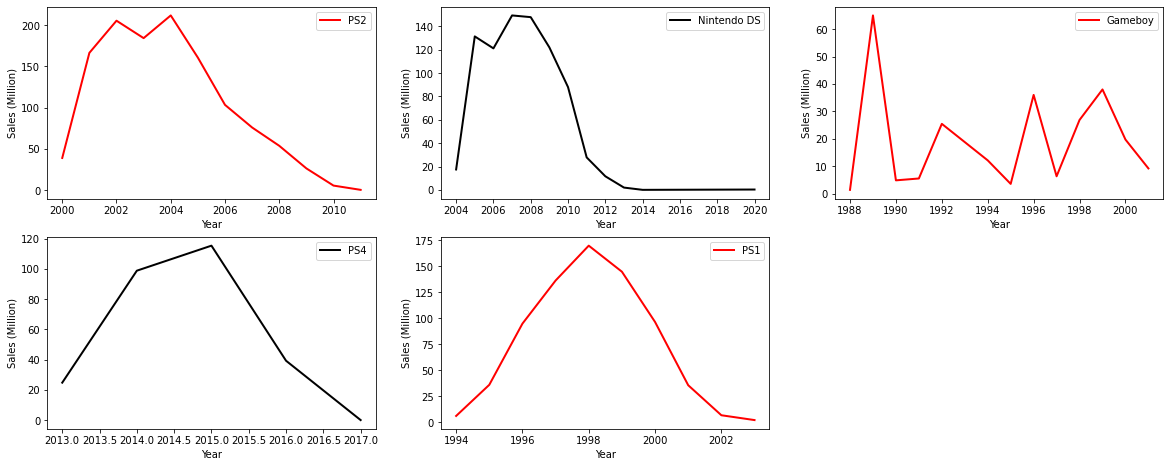

In [67]:
##Plot the data into a multi-plot graph
#Values and labels
ps2val = ([ps2_00gs,ps2_01gs,ps2_02gs,ps2_03gs,ps2_04gs,ps2_05gs,ps2_06gs,ps2_07gs,ps2_08gs,ps2_09gs,ps2_10gs,ps2_11gs,0]) 
ps2lab = (ps2yr)
ndsval =  ([nds_04gs,nds_05gs,nds_06gs,nds_07gs,nds_08gs,nds_09gs,nds_10gs,nds_11gs,nds_12gs,nds_13gs,nds_14gs,nds_20gs,0])
ndslab = (ndsyrl)
gbval = ([gb_88gs,gb_89gs,gb_90gs,gb_91gs,gb_92gs,gb_94gs,gb_95gs,gb_96gs,gb_97gs,gb_98gs,gb_99gs,gb_00gs,gb_01gs,0])
gblab = (gbyr)
ps4val = ([ps4_13gs,ps4_14gs,ps4_15gs,ps4_16gs,ps4_17gs])
ps4lab = (ps4yr)
ps1val = ([ps1_94gs,ps1_95gs,ps1_96gs,ps1_97gs,ps1_98gs,ps1_99gs,ps1_00gs,ps1_01gs,ps1_02gs,ps1_03gs, 0])
ps1lab = (ps1yr)

#Graph sizes
mpy.figure(figsize=(20,12))

#Plot data into different subplots
mpy.subplot(331)
plotps2 = mpy.plot(ps2lab, ps2val, label= 'PS2', color= 'red', linewidth= 2)
mpy.ylabel('Sales (Million)')
mpy.xlabel('Year')
mpy.legend()

mpy.subplot(332)
plotnds = mpy.plot(ndslab, ndsval, label= 'Nintendo DS', color= 'black', linewidth= 2)
mpy.ylabel('Sales (Million)')
mpy.xlabel('Year')
mpy.legend()

mpy.subplot(333)
plotgb = mpy.plot(gblab, gbval, label= 'Gameboy', color= 'red', linewidth= 2)
mpy.ylabel('Sales (Million)')
mpy.xlabel('Year')
mpy.legend()

mpy.subplot(334)
plotps4 = mpy.plot(ps4lab, ps4val, label= 'PS4', color= 'black', linewidth= 2)
mpy.ylabel('Sales (Million)')
mpy.xlabel('Year')
mpy.legend()

mpy.subplot(335)
plotps1 = mpy.plot(ps1lab, ps1val, label= 'PS1', color= 'red', linewidth= 2)
mpy.ylabel('Sales (Million)')
mpy.xlabel('Year')
mpy.legend()

#### Compare genre distribution

Within this section I will compare the interest per genre within every region: EU, JP, NA and global sales. 

In [43]:
cols

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [44]:
##Print all unique genres
vgs.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [45]:
euro = vgs[['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher','EU_Sales']]

In [46]:
##Summarise sales count for each genre - EU
sports_eu = vgs.loc[vgs['Genre'] == 'Sports']
sports_eu = sports_eu['EU_Sales'].sum()
platfrom_eu = vgs.loc[vgs['Genre'] == 'Platform']
platfrom_eu = platfrom_eu['EU_Sales'].sum()
racing_eu = vgs.loc[vgs['Genre'] == 'Racing']
racing_eu = racing_eu['EU_Sales'].sum()
rpg_eu = vgs.loc[vgs['Genre'] == 'Role-Playing']
rpg_eu = rpg_eu['EU_Sales'].sum()
puzzle_eu = vgs.loc[vgs['Genre'] == 'Puzzle']
puzzle_eu = puzzle_eu['EU_Sales'].sum()
misc_eu = vgs.loc[vgs['Genre'] == 'Misc']
misc_eu = misc_eu['EU_Sales'].sum()
shooter_eu =vgs.loc[vgs['Genre'] == 'Shooter']
shooter_eu = shooter_eu['EU_Sales'].sum()
sim_eu = vgs.loc[vgs['Genre'] == 'Simulation']
sim_eu = sim_eu['EU_Sales'].sum()
action_eu = vgs.loc[vgs['Genre'] == 'Action']
action_eu = action_eu['EU_Sales'].sum()
fighting_eu = vgs.loc[vgs['Genre'] == 'Fighting']
fighting_eu = fighting_eu['EU_Sales'].sum()
adv_eu = vgs.loc[vgs['Genre'] == 'Adventure']
adv_eu = adv_eu['EU_Sales'].sum()
strategy_eu =  vgs.loc[vgs['Genre'] == 'Strategy']
strategy_eu = strategy_eu['EU_Sales'].sum()

In [47]:
na = vgs[['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales']]

In [48]:
##Summarise sales count for each genre - NA
sports_na = vgs.loc[vgs['Genre'] == 'Sports']
sports_na = sports_na['NA_Sales'].sum()
platfrom_na = vgs.loc[vgs['Genre'] == 'Platform']
platfrom_na = platfrom_na['NA_Sales'].sum()
racing_na = vgs.loc[vgs['Genre'] == 'Racing']
racing_na = racing_na['NA_Sales'].sum()
rpg_na = vgs.loc[vgs['Genre'] == 'Role-Playing']
rpg_na = rpg_na['NA_Sales'].sum()
puzzle_na = vgs.loc[vgs['Genre'] == 'Puzzle']
puzzle_na = puzzle_na['NA_Sales'].sum()
misc_na = vgs.loc[vgs['Genre'] == 'Misc']
misc_na = misc_na['NA_Sales'].sum()
shooter_na =vgs.loc[vgs['Genre'] == 'Shooter']
shooter_na = shooter_na['NA_Sales'].sum()
sim_na = vgs.loc[vgs['Genre'] == 'Simulation']
sim_na = sim_na['NA_Sales'].sum()
action_na = vgs.loc[vgs['Genre'] == 'Action']
action_na = action_na['NA_Sales'].sum()
fighting_na = vgs.loc[vgs['Genre'] == 'Fighting']
fighting_na = fighting_na['NA_Sales'].sum()
adv_na = vgs.loc[vgs['Genre'] == 'Adventure']
adv_na = adv_na['NA_Sales'].sum()
strategy_na =  vgs.loc[vgs['Genre'] == 'Strategy']
strategy_na = strategy_na['NA_Sales'].sum()

In [49]:
jap = vgs[['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'JP_Sales']]

In [50]:
##Summarise sales count for each genre - JP
sports_jp = vgs.loc[vgs['Genre'] == 'Sports']
sports_jp = sports_jp['JP_Sales'].sum()
platfrom_jp = vgs.loc[vgs['Genre'] == 'Platform']
platfrom_jp = platfrom_jp['JP_Sales'].sum()
racing_jp = vgs.loc[vgs['Genre'] == 'Racing']
racing_jp = racing_jp['JP_Sales'].sum()
rpg_jp = vgs.loc[vgs['Genre'] == 'Role-Playing']
rpg_jp = rpg_jp['JP_Sales'].sum()
puzzle_jp = vgs.loc[vgs['Genre'] == 'Puzzle']
puzzle_jp = puzzle_jp['JP_Sales'].sum()
misc_jp = vgs.loc[vgs['Genre'] == 'Misc']
misc_jp = misc_jp['JP_Sales'].sum()
shooter_jp =vgs.loc[vgs['Genre'] == 'Shooter']
shooter_jp = shooter_jp['JP_Sales'].sum()
sim_jp = vgs.loc[vgs['Genre'] == 'Simulation']
sim_jp = sim_jp['JP_Sales'].sum()
action_jp = vgs.loc[vgs['Genre'] == 'Action']
action_jp = action_jp['JP_Sales'].sum()
fighting_jp = vgs.loc[vgs['Genre'] == 'Fighting']
fighting_jp = fighting_jp['JP_Sales'].sum()
adv_jp = vgs.loc[vgs['Genre'] == 'Adventure']
adv_jp = adv_jp['JP_Sales'].sum()
strategy_jp =  vgs.loc[vgs['Genre'] == 'Strategy']
strategy_jp = strategy_jp['JP_Sales'].sum()

In [51]:
oth = vgs[['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Other_Sales']]

In [52]:
##Summarise sales count for each genre - Other
sports_oth = vgs.loc[vgs['Genre'] == 'Sports']
sports_oth = sports_oth['Other_Sales'].sum()
platfrom_oth = vgs.loc[vgs['Genre'] == 'Platform']
platfrom_oth = platfrom_oth['Other_Sales'].sum()
racing_oth = vgs.loc[vgs['Genre'] == 'Racing']
racing_oth = racing_oth['Other_Sales'].sum()
rpg_oth = vgs.loc[vgs['Genre'] == 'Role-Playing']
rpg_oth = rpg_oth['Other_Sales'].sum()
puzzle_oth = vgs.loc[vgs['Genre'] == 'Puzzle']
puzzle_oth = puzzle_oth['Other_Sales'].sum()
misc_oth = vgs.loc[vgs['Genre'] == 'Misc']
misc_oth = misc_oth['Other_Sales'].sum()
shooter_oth =vgs.loc[vgs['Genre'] == 'Shooter']
shooter_oth = shooter_oth['Other_Sales'].sum()
sim_oth = vgs.loc[vgs['Genre'] == 'Simulation']
sim_oth = sim_oth['Other_Sales'].sum()
action_oth = vgs.loc[vgs['Genre'] == 'Action']
action_oth = action_oth['Other_Sales'].sum()
fighting_oth = vgs.loc[vgs['Genre'] == 'Fighting']
fighting_oth = fighting_oth['Other_Sales'].sum()
adv_oth = vgs.loc[vgs['Genre'] == 'Adventure']
adv_oth = adv_oth['Other_Sales'].sum()
strategy_oth =  vgs.loc[vgs['Genre'] == 'Strategy']
strategy_oth = strategy_oth['Other_Sales'].sum()

<Figure size 432x288 with 0 Axes>

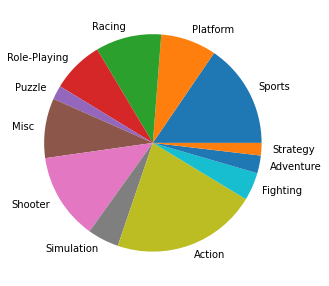

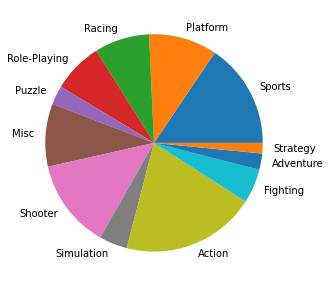

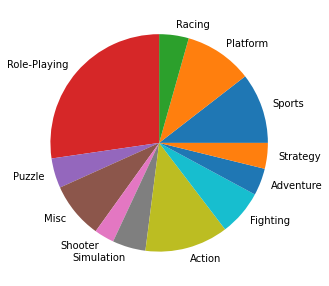

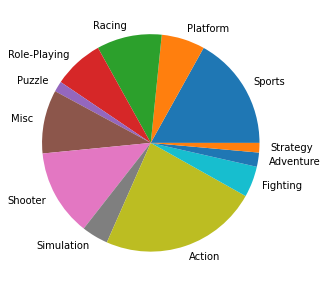

In [53]:
##Plot data into a multi-pie graph

#Values for pie 
eu_values = ([sports_eu,platfrom_eu,racing_eu,rpg_eu,puzzle_eu,misc_eu,shooter_eu,sim_eu,action_eu,fighting_eu,adv_eu,strategy_eu])
na_values = ([sports_na,platfrom_na,racing_na,rpg_na,puzzle_na,misc_na,shooter_na,sim_na,action_na,fighting_na,adv_na,strategy_na])
jp_values = ([sports_jp,platfrom_jp,racing_jp,rpg_jp,puzzle_jp,misc_jp,shooter_jp,sim_jp,action_jp,fighting_jp,adv_jp,strategy_jp])
oth_values = ([sports_oth,platfrom_oth,racing_oth,rpg_oth,puzzle_oth,misc_oth,shooter_oth,sim_oth,action_oth,fighting_oth,adv_oth,strategy_oth])

#Labels for pie
pielabels = (['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'])

#Plot data into different pies
mpy.figure(0)
mpy.figure(figsize= (10,5))
eu_pie = mpy.pie(eu_values, labels = pielabels)
mpy.title = 'EU Sales'

mpy.figure(1)
mpy.figure(figsize= (10,5))
na_pie = mpy.pie(na_values, labels = pielabels)
mpy.title = 'NA Sales'

mpy.figure(2)
mpy.figure(figsize= (10,5))
jp_pie = mpy.pie(jp_values, labels = pielabels)
mpy.title = 'JP Sales'

mpy.figure(3)
mpy.figure(figsize= (10,5))
oth_pie = mpy.pie(oth_values, labels = pielabels)
mpy.title = 'Other Sales'

mpy.show()